# **Code for Resynchronization Paper**

# **Figure 1**

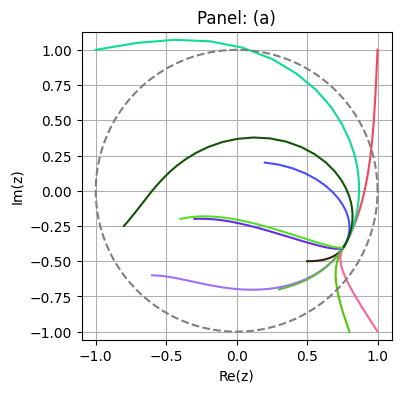

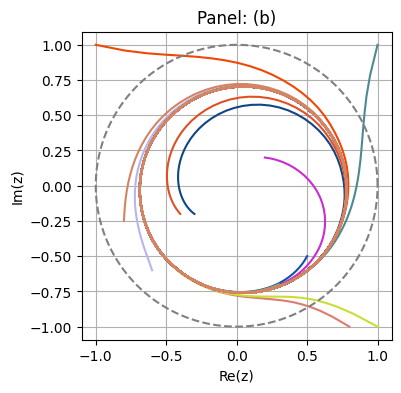

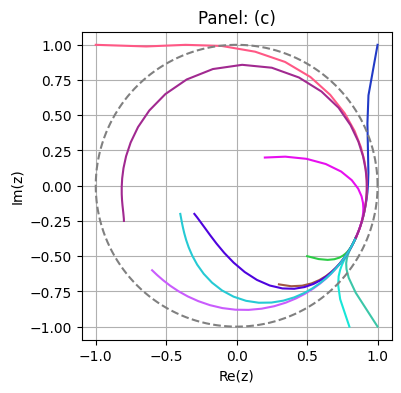

In [24]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def reduced_dynamics(t, z, K, F, Delta, Omega):
    """
    Governs the dynamics of the order parameter z:
    dz/dt = (1/2) * [(Kz + F) - z^2 * conj(Kz + F)] - (Delta + i*Omega)*z
    """
    z_conj = np.conjugate(z)
    dzdt = 0.5 * ((K * z + F) - z**2 * (K * z + F).conjugate()) - (Delta + 1j* Omega) * z
    return dzdt
def solve_reduced_dynamics(K, F, Delta, Omega, z0, t_span, t_eval):
    """
    Solves the reduced dynamics for z using solve_ivp.
    """
    sol = solve_ivp(
        lambda t, z: reduced_dynamics(t, z[0], K, F, Delta, Omega),
        t_span, [z0],
        t_eval=t_eval #points at which data is stored
    )
    return sol

# Parameters
initial_values = [[4.5, 3, 1.4], [4.5, 0.65, 1.4], [10.0, 3.5, 1.4]]
letters = ["(a)", "(b)", "(c)"]
K = 4.5
F = 3
Omega = 1.4
Delta = 1.0
t_span = (0, 50)  # Time span for the simulation
t_eval = np.linspace(*t_span, 1000)  # Evaluation points
# Generate multiple initial conditions for z0
initial_conditions = [
    1 + 1j, 0.8 -1j, 1 -1j, -1 + 1j, 0.2 + 0.2j, -0.6 -0.6j, 0.5 - 0.5j, 0.3 - 0.7j, 
    -0.3 - 0.2j, -0.4 - 0.2j, -0.8 - 0.25j
]

# Plot trajectories for each initial condition
for count, arr in enumerate(initial_values):
    # Plot phase portrait
    plt.figure(figsize=(4, 4))
    K = arr[0]
    F = arr[1] 
    Omega = arr[2]
    for z0 in initial_conditions:
        sol = solve_reduced_dynamics(K, F, Delta, Omega, z0, t_span, t_eval)
        z = sol.y[0]
        # Filter to include only points within the unit circle
        mask = np.abs(z) <= 1  # Keep points where |z| <= 1
        z_filtered = z[mask]

        # Plot the filtered trajectory
        #plt.plot(z_filtered.real, z_filtered.imag)
        plt.plot(z.real, z.imag, color=np.random.rand(3,))

    # Plot unit circle for reference
    circle = np.linspace(0, 2 * np.pi, 500)
    plt.plot(np.cos(circle), np.sin(circle), '--', color="gray", label="|z| = 1 (Unit Circle)")

    # Labels and formatting
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")
    plt.title(f"Panel: {letters[count]}")
    plt.axis("equal")
    plt.grid()
    plt.show()
